Išnagrinėti trijų kūnų gravitacinę (pagal Niutono dėsnius) sąveiką, ypač žinomą atvejį, kai 3 kūnai seka vienas kitą plokštumoje ta pačia 0-niukės trajektorija.

Daromos prielaidos: trijų kūnų masė yra vienoda, ir jie juda vienoje plokštumoje.

Diferencialinių lygčių sistema su dvimačiais vektoriais $\vec{u},\vec{v},\vec{w}$, nusakančiais 3 kūnų padėtį plokštumoje:

$\displaystyle \frac{d^2}{dt^2}\vec{u} = \frac{\vec{v}-\vec{u}}{||\,\vec{u}-\vec{v}\,||^3}+\frac{\vec{w}-\vec{u}}{||\,\vec{u}-\vec{w}\,||^3},$

$\displaystyle \frac{d^2}{dt^2}\vec{v} = \frac{\vec{u}-\vec{v}}{||\,\vec{u}-\vec{v}\,||^3}+\frac{\vec{w}-\vec{v}}{||\,\vec{v}-\vec{w}\,||^3},$

$\displaystyle \frac{d^2}{dt^2}\vec{w} = \frac{\vec{u}-\vec{w}}{||\,\vec{u}-\vec{w}\,||^3}+\frac{\vec{v}-\vec{w}}{||\,\vec{v}-\vec{w}\,||^3},$

su panašia interpretacija kaip 16-os paskaitos 6-oje skaidrėje (tik plokštumoje $R^2$ vietoj $R^3$ erdvės). Kadangi 3 masės yra vienodos, daroma prielaida $m_1=m_2=m_3=G=1$. 

Praktiškai turime šešių lygčių sistemą šešioms nežinomoms funkcijoms (vektorių $\vec{u},\vec{v},\vec{w}\in R^2$ komponentėms). Sistemos eilė yra lygi 12. Galima dayti prieladas 

$\vec{u}+\vec{v}+\vec{w}=0\ $ (masių centrui) ir $\displaystyle\ \frac{d\vec{u}}{dt}+\frac{d\vec{v}}{dt}+\frac{d\vec{w}}{dt}=0\ $ (bendram impulsui),

tuo eliminuoti pvz. $\vec{w}$ ir $\displaystyle\ \frac{d\vec{w}}{dt},\ $ bei sumažinti sistemos eilę iki 8. 

Pradinės sąlygos numatomos tokios:

$\vec{u}(t_0)=(-1,0), \qquad \vec{v}(t_0)=(1,0), \qquad\vec{w}(t_0)=(0,0)$,

$\displaystyle\frac{d\vec{u}}{dt}(t_0)=\frac{d\vec{v}}{dt}(t_0)=(p_0,q_0), \qquad \frac{d\vec{w}}{dt}(t_0)=(-2p_0,-2q_0)$,

kur $p_0,q_0$ yra įvesties parametrai. Aštuoniukės trajektorijai pradinės sąlygos:

$p_0=0.347116888118926938242777, \qquad q_0 = 0.532724945388030229262028.$

Trajektorijos skaičiavimui galima naudoti energijos tvermės dėsnį 

$\displaystyle E=\frac12\Big(\frac{d\vec{u}}{dt}\Big)^2+\frac12\Big(\frac{d\vec{v}}{dt}\Big)^2+\frac12\Big(\frac{d\vec{w}}{dt}\Big)^2-\frac{1}{||\,\vec{u}-\vec{v}\,||}-\frac{1}{||\,\vec{u}-\vec{w}\,||}-\frac{1}{||\,\vec{v}-\vec{w}\,||}$

ir impulso momento tvermės dėsnį $\displaystyle\ \vec{C}=\vec{u}\times\frac{d\vec{u}}{dt}+\vec{v}\times\frac{d\vec{v}}{dt}+\vec{w}\times\frac{d\vec{w}}{dt}$

paklaidos tikrinimui arba dar kelių komponenčių eliminavimui. Vectorius $\vec{C}$ yra ortogonalus jud4jimo plok6tumai. Su nagrinėjomis pradinėmis sąlygomis, $\vec{C}=0$.

In [1]:
# Imports
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sympy import flatten
from matplotlib.lines import Line2D


In [2]:
# Utility functions
def vector(tuple):
    return np.array(tuple)

def vectors(*args):
    return [vector(arg) for arg in args]

def minMaxRange(array):
    return (min(array), max(array))

def combineMinMaxRanges(ranges):
    return (min([r[0] for r in ranges]), max([r[1] for r in ranges]))

In [3]:
class Planet:
    def __init__(self, name, radius, color, positions):
        self.name = name
        self.radius = radius
        self.color = color
        self.positions = positions # Calculated Positions

In [38]:
# Three Body Problem Solver
def systemOfDiffEquations(vars,t): 
    # Expecetd input is positions and velocities of 3 bodies
    # Note: velocity in code is d<body>, acceleration is dd<body> where <body> is u,v or w
    u1, u2, v1, v2, w1, w2, du1, du2, dv1, dv2, dw1, dw2 = vars
    u = (u1, u2)
    v = (v1, v2)
    w = (w1, w2)
    du = (du1, du2)
    dv = (dv1, dv2)
    dw = (dw1, dw2)
    u,v,w,du,dv,dw = vectors(u,v,w,du,dv,dw)
    ddu = (v-u)/np.linalg.norm(u-v)**3 + (w-u)/np.linalg.norm(u-w)**3
    ddv = (u-v)/np.linalg.norm(u-v)**3 + (w-v)/np.linalg.norm(v-w)**3
    ddw = (u-w)/np.linalg.norm(u-w)**3 + (v-w)/np.linalg.norm(v-w)**3
    return flatten((du, dv, dw, ddu, ddv, ddw))

def calcuateInitialConditions(p,q):
    u = (-1, 0)
    v = (1, 0)
    w = (0, 0)
    du = dv = (p,q)
    dw = (-2*p, -2*q)
    return flatten((u,v,w, du, dv, dw))

def solveThreeBodyProblem(p,q,t):
    print("Solving Three Body Problem for p = {} and q = {}".format(p,q))
    init = calcuateInitialConditions(p,q)
    sol = odeint(systemOfDiffEquations, init, t)
    planets = []
    planets.append(Planet("U", 1, "teal", sol[:,:2]))
    planets.append(Planet("V", 1, "orange", sol[:,2:4]))
    planets.append(Planet("W", 1, "purple", sol[:,4:6]))
    print("Done")
    return planets

ep = 0.347116888118926938242777
eq = 0.532724945388030229262028


In [37]:
class Plotter:
    def __init__(self, planets, t, trail_length=0):
        self.planets = planets
        self.t = t
        self.trail_length = trail_length
        self.fig, self.ax = plt.subplots()
        self.points = [self.ax.plot([], [], 'o', markersize=7+planet.radius, markerfacecolor=planet.color, markeredgecolor="none") for planet in self.planets]
        self.labels = []
        self.legend = self.ax.legend([""], loc='upper left', bbox_to_anchor=(0.75, -0.1), fancybox=True, shadow=True, ncol=3)

    def update(self, frame):
        print(f"Rendering frame: {frame} / {len(self.t)}")
        # Create custom legend handles with correct colors
        trail = [planet.positions[max(0, frame - self.trail_length):frame + 1] for planet in self.planets]
        for i, point in enumerate(self.points):
            point[0].set_data(trail[i][:,0], trail[i][:,1])

        for label in self.labels:
            label.remove()
        self.labels.clear()

        for planet in self.planets:
            label_obj = self.ax.annotate(planet.name, planet.positions[frame],  textcoords="offset points", xytext=(0, 10), ha='center')
            self.labels.append(label_obj)

        # Update the legend text
        self.legend.get_texts()[0].set_text(f'Time: {self.t[frame]:.2f}s')

        return self.points[0][0], self.points[1][0], self.points[2][0],

    def configure(self):
        xRange = combineMinMaxRanges([minMaxRange(planet.positions[:,0]) for planet in self.planets])
        yRange = combineMinMaxRanges([minMaxRange(planet.positions[:,1]) for planet in self.planets])
        self.ax.set_xlim(xRange[0]-0.1, xRange[1]+0.1)
        self.ax.set_ylim(yRange[0]-0.1, yRange[1]+0.1)
        plt.tight_layout()

    def showStateAtTime(self, t):
        self.update(t)
        plt.show()

    def animate(self, filename, fps):
        animation = FuncAnimation(self.fig, self.update, frames=len(self.t), interval=int(1000/fps), blit=True)
        animation.save(filename, writer='imagemagick')


In [29]:
class ThreeBody2DVisualizer:
    def __init__(self, p, q):
        self.p = p
        self.q = q
        self.plotter = None
        self.fps = 30
    
    def __loadData(self, t):
        planets = solveThreeBodyProblem(self.p, self.q, t)
        plotter = Plotter(planets, t)
        plotter.configure()
        return plotter

    def animate(self, length, timeSlowingFactor=1, trail=0, filename="planets.gif"):
        t = np.linspace(0, length, int(length*timeSlowingFactor)*self.fps)
        plotter = self.__loadData(t)
        plotter.trail_length = trail
        plotter.animate(filename, self.fps)
        self.plotter = plotter
    
    def showStateAtTime(self, t):
        t = np.linspace(0, t, 2)
        plotter = self.__loadData(t)
        plotter.showStateAtTime(1)

MovieWriter imagemagick unavailable; using Pillow instead.


Solving Three Body Problem for p = 0.34711688811892694 and q = 0.5327249453880303
Done
Rendering frame: 0 / 500
Rendering frame: 0 / 500
Rendering frame: 0 / 500
Rendering frame: 0 / 500
Rendering frame: 1 / 500
Rendering frame: 2 / 500
Rendering frame: 3 / 500
Rendering frame: 4 / 500
Rendering frame: 5 / 500
Rendering frame: 6 / 500
Rendering frame: 7 / 500
Rendering frame: 8 / 500
Rendering frame: 9 / 500
Rendering frame: 10 / 500
Rendering frame: 11 / 500
Rendering frame: 12 / 500
Rendering frame: 13 / 500
Rendering frame: 14 / 500
Rendering frame: 15 / 500
Rendering frame: 16 / 500
Rendering frame: 17 / 500
Rendering frame: 18 / 500
Rendering frame: 19 / 500
Rendering frame: 20 / 500
Rendering frame: 21 / 500
Rendering frame: 22 / 500
Rendering frame: 23 / 500
Rendering frame: 24 / 500
Rendering frame: 25 / 500
Rendering frame: 26 / 500
Rendering frame: 27 / 500
Rendering frame: 28 / 500
Rendering frame: 29 / 500
Rendering frame: 30 / 500
Rendering frame: 31 / 500
Rendering frame:

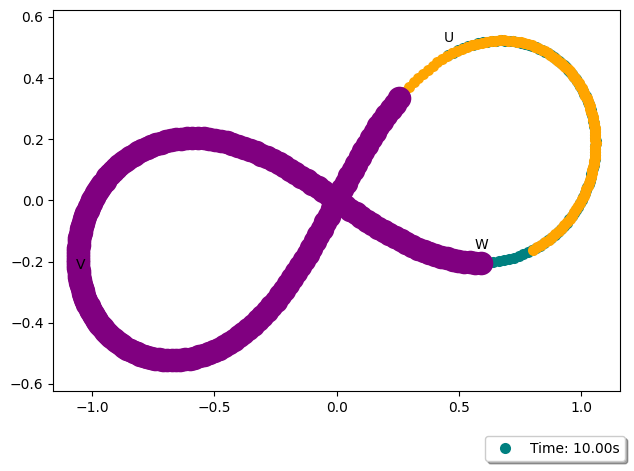

In [39]:
viz = ThreeBody2DVisualizer(ep, eq)
viz.fps = 50
viz.animate(10, 1, trail=200)

Solving Three Body Problem for p = 0.5327249453880303 and q = 0.34711688811892694


MovieWriter imagemagick unavailable; using Pillow instead.


Done
Rendering frame: 0 / 1500
Rendering frame: 0 / 1500
Rendering frame: 0 / 1500
Rendering frame: 0 / 1500
Rendering frame: 1 / 1500
Rendering frame: 2 / 1500
Rendering frame: 3 / 1500
Rendering frame: 4 / 1500
Rendering frame: 5 / 1500
Rendering frame: 6 / 1500
Rendering frame: 7 / 1500
Rendering frame: 8 / 1500
Rendering frame: 9 / 1500
Rendering frame: 10 / 1500
Rendering frame: 11 / 1500
Rendering frame: 12 / 1500
Rendering frame: 13 / 1500
Rendering frame: 14 / 1500
Rendering frame: 15 / 1500
Rendering frame: 16 / 1500
Rendering frame: 17 / 1500
Rendering frame: 18 / 1500
Rendering frame: 19 / 1500
Rendering frame: 20 / 1500
Rendering frame: 21 / 1500
Rendering frame: 22 / 1500
Rendering frame: 23 / 1500
Rendering frame: 24 / 1500
Rendering frame: 25 / 1500
Rendering frame: 26 / 1500
Rendering frame: 27 / 1500
Rendering frame: 28 / 1500
Rendering frame: 29 / 1500
Rendering frame: 30 / 1500
Rendering frame: 31 / 1500
Rendering frame: 32 / 1500
Rendering frame: 33 / 1500
Rendering

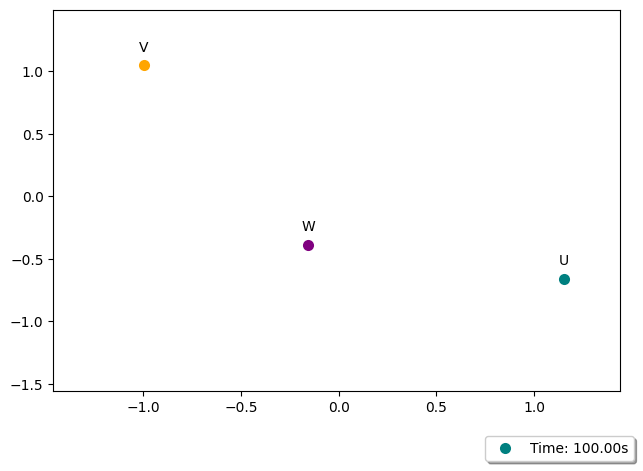

In [33]:
example = ThreeBody2DVisualizer(eq, ep)
example.fps = 30
example.animate(100, 1/2, trail=0, filename="inverse.gif")